In [3]:
%reload_ext autoreload
%autoreload 2

from data_inputs import *
from sim_data import *
from models import *
import settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Static Model Optimization

In [2]:
## TODO: modular inputs: batt size, gt startup cost, gt fuel cost, demand min

# Static, non-stochastic
static_df = get_static_vpp_output()
static_df.head()

TypeError: get_static_vpp_output() missing 1 required positional argument: 'param_dict'

In [ ]:
weekly_profit_static = sum(static_df.hourly_profit)
weekly_profit_static

In [ ]:
%matplotlib inline
plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plot_stat = plt.plot(static_df['batt_flow'], label='battery')
plot_stat = plt.plot(static_df['turb_gen'], label='turbine')
plot_stat = plt.plot(static_df['solar_gen'], label='solar')
plot_stat = plt.plot(static_df['wind_gen'], label='wind')
plot_stat = plt.plot(static_df['net_out'], color='m', linewidth=3, label='net output')
plot_stat = plt.plot(static_df['net_gen'], color='k', linewidth=3, label='net generation')
plt.legend()
plt.xlabel('Time (h)')
plt.ylabel('Power (MWh)')
plt.title('Static Forecast Optimization')

### Stochastic Model Optimization

In [ ]:
# Stochastic
stoc_df, rev_stoc, fine_stoc = get_stochastic_vpp_output(settings.param_dict)
stoc_df.head()

In [ ]:
stoc_df['net_out'][0]

In [ ]:
stoc_df.to_csv('stochastic_base_case_results.csv')

In [ ]:
weekly_profit_stoc = sum(rev_stoc)/(settings.SIMS**3)
weekly_profit_stoc

In [ ]:
np.mean(fine_stoc)

In [ ]:
plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plot_stat = plt.plot(stoc_df['batt_flow'], label='battery')
plot_stat = plt.plot(stoc_df['turb_gen'], label='turbine')
plot_stat = plt.plot(stoc_df['solar_gen'], label='solar')
plot_stat = plt.plot(stoc_df['wind_gen'], label='wind')
plot_stat = plt.plot(stoc_df['net_out'], color='m', linewidth=3, label='net output')
plot_stat = plt.plot(stoc_df['net_gen'], color='k', linewidth=3, label='net generation')
plt.legend()
plt.xlabel('Time (h)')
plt.ylabel('Power (MWh)')
plt.title('Stochastic Forecast Optimization')

In [ ]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist(rev_stoc)
hist = ax.set_title('Distribution of Net Weekly Revenue for Stochastic Scenarios')

### No Battery Static

In [ ]:
nb_static_df = get_static_nb_output()
nb_static_df.head()

In [ ]:
weekly_profit_nb = sum(nb_static_df.hourly_profit)
weekly_profit_nb

In [ ]:
plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plot_nb = plt.plot(nb_static_df['turb_gen'], label='turbine')
plot_nb = plt.plot(nb_static_df['solar_gen'], label='solar')
plot_nb = plt.plot(nb_static_df['wind_gen'], label='wind')
plot_nb = plt.plot(nb_static_df['net_out'], color='m', linewidth=3, label='net output')
plot_nb = plt.plot(nb_static_df['net_gen'], color='k', linewidth=3, label='net generation')
plt.legend()
plt.xlabel('Time (h)')
plt.ylabel('Power (MWh)')
plt.title('No Battery, Static Forecast Optimization')

### No Battery, Stochastic

In [4]:
nb_stoc_df, nb_stoc_rev, nb_stoc_fine = get_stochastic_nb_output(settings.param_dict)
nb_stoc_df.head()

Academic license - for non-commercial use only


,hour,turb_on,turb_start,turb_gen,solar_gen,wind_gen,net_gen,net_out,elect_price,hourly_profit,fine
0,0,1,0,52,0.0,6.55,58.55,58.55,32.48,-698.2960,0
1,1,0,0,0,0.0,8.76,8.76,8.76,32.40,283.8240,0
2,2,0,0,0,0.0,8.76,8.76,8.76,32.14,281.5464,0
3,3,0,0,0,0.0,5.81,5.81,5.81,32.08,186.3848,0
4,4,0,0,0,0.0,3.60,3.60,3.60,31.18,112.2480,0


In [5]:
weekly_profit_nb_stoc = sum(nb_stoc_df.hourly_profit)
weekly_profit_nb_stoc

83663.00316666672

Text(0.5,1,'No Battery, Stochastic Forecast Optimization')

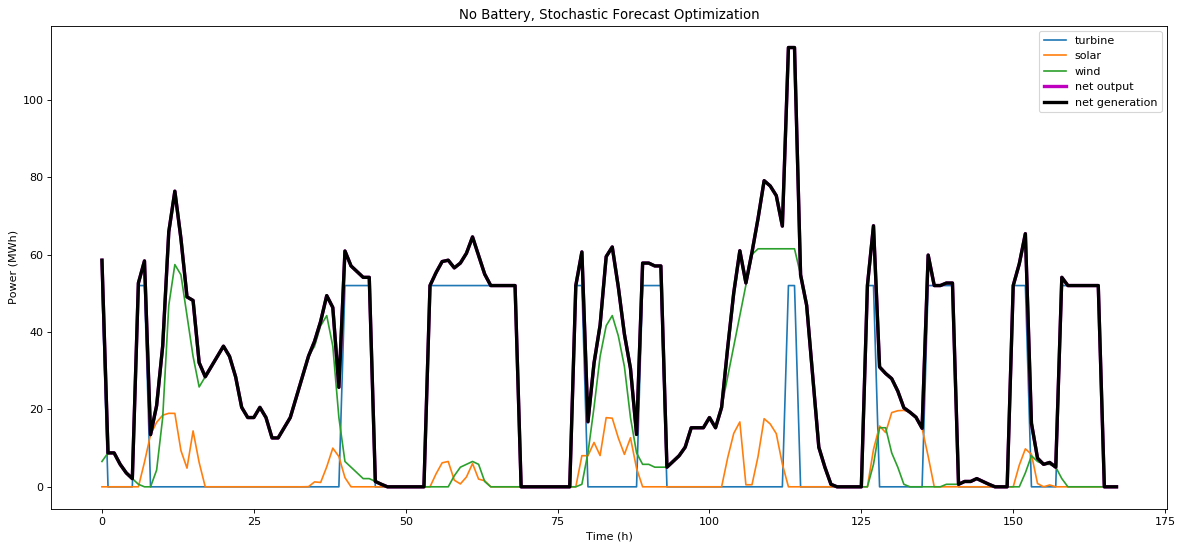

In [6]:
plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plot_nb = plt.plot(nb_stoc_df['turb_gen'], label='turbine')
plot_nb = plt.plot(nb_stoc_df['solar_gen'], label='solar')
plot_nb = plt.plot(nb_stoc_df['wind_gen'], label='wind')
plot_nb = plt.plot(nb_stoc_df['net_out'], color='m', linewidth=3, label='net output')
plot_nb = plt.plot(nb_stoc_df['net_gen'], color='k', linewidth=3, label='net generation')
plt.legend()
plt.xlabel('Time (h)')
plt.ylabel('Power (MWh)')
plt.title('No Battery, Stochastic Forecast Optimization')

C:\Users\Andre\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


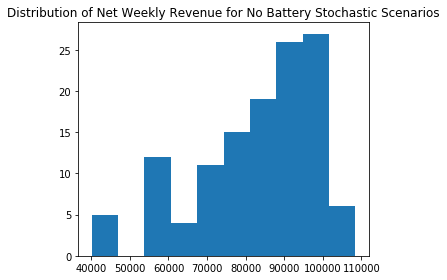

In [7]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist(nb_stoc_rev)
hist = ax.set_title('Distribution of Net Weekly Revenue for No Battery Stochastic Scenarios')

In [12]:
#nb_stoc_df.to_csv('NB_stochastic_base_case_results.csv')
df_nb_stoc_rev = pd.DataFrame(list(range(125)), columns=['Sim'])
df_nb_stoc_rev['weekly_rev'] = [nb_stoc_rev[i] for i in range(125)]
#df_nb_stoc_rev.to_csv('NB_stochastic_distribution_of_rev.csv')

In [ ]:
p_sim, w_sim, l_sim, sim_perm = get_sim_data()

In [ ]:
p_sim.set_index('hour', inplace=True)
w_sim.set_index('hour', inplace=True)
l_sim.set_index('hour', inplace=True)

In [ ]:
p_sim.head()

In [ ]:
%matplotlib qt

styles = ['k-','r-.','y-.', 'b-.', 'c-.', 'm-.', 'g-.',\
          'r--','y--', 'b--', 'c--', 'm--', 'g--']
styles = styles[:settings.SIMS+1]
linewidths = [3] + [1]*settings.SIMS

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('Simulation Data')

for col, style, lw in zip(p_sim.columns, styles, linewidths):
    p_sim[col].plot(style=style, lw=lw, ax=ax1)
ax1.set(ylabel='Solar Power (MWh)')
ax1.yaxis.grid(color='gray', linestyle='solid')

for col, style, lw in zip(w_sim.columns, styles, linewidths):
    w_sim[col].plot(style=style, lw=lw, ax=ax2)
ax2.set(ylabel='Wind Power (MWh)')
ax2.yaxis.grid(color='gray', linestyle='solid')

for col, style, lw in zip(l_sim.columns, styles, linewidths):
    l_sim[col].plot(style=style, lw=lw, ax=ax3)
ax3.set(ylabel='Electricity Price ($)')
ax3.yaxis.grid(color='gray', linestyle='solid')

ax1.legend(p_sim.columns[1:].insert(0,'actual forecast'),\
           bbox_to_anchor=(1.04,1), loc='upper left')
plt.subplots_adjust(right=0.7)
fig.show()


### Cost Analysis
- Battery cost = \$398/kWh  
- System capacity = 352 MWh  
- Revenue difference ~ $100k/wk  

In [ ]:
batt_cap = 352*1000  # kwh
batt_cost = batt_cap * 200
batt_cost

In [ ]:
payback_weeks = batt_cost / 10e4
payback_weeks

In [ ]:
payback_yrs = payback_weeks/52
payback_yrs

In [ ]:
2600/6

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/solar.csv')
df.head()

In [ ]:
data=df.to_dict('records')

In [ ]:
MIN_GEN = 12
B_MIN = -40

MIN_GEN_LIST=([B_MIN]*6 + [MIN_GEN]*15 + [B_MIN]*3)*7
len(MIN_GEN_LIST)